In [1]:
# Load local libraries
import __load_libs
from src.df_io import from_csv, to_csv

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import chi2_contingency

# Problem 4. Exploratory data analysis 

In [2]:
patients_df = from_csv('../data/03_data_cleaned.csv')
patients_df.shape

(2017, 28)

In [3]:
patients_df.dtypes

age                           int64
gender                     category
ethnicity                  category
education_level            category
bmi                         float64
smoking                    category
physical_activity          category
diet_quality               category
sleep_quality              category
pollution_exposure         category
pollen_exposure            category
dust_exposure              category
pet_allergy                category
family_history_asthma      category
history_of_allergies       category
eczema                     category
hay_fever                  category
gastroesophageal_reflux    category
lung_function_fev1          float64
lung_function_fvc           float64
wheezing                   category
shortness_of_breath        category
chest_tightness            category
coughing                   category
nighttime_symptoms         category
exercise_induced           category
diagnosis                  category
fev1_fvc_ratio              

## Distributions

Let's check the distributions of each feature.

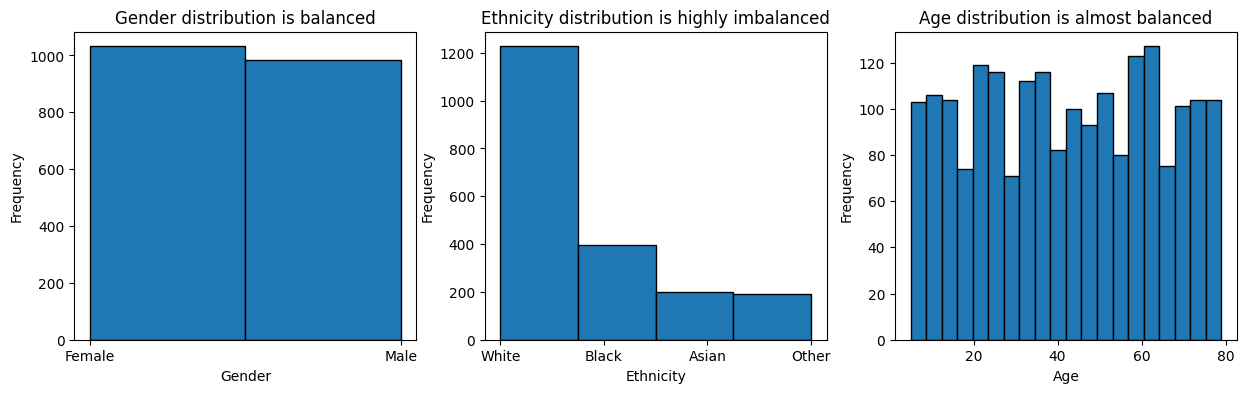

In [4]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(patients_df['gender'], bins=2, edgecolor='black')
plt.title('Gender distribution is balanced')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Female', 'Male'])

plt.subplot(1, 3, 2)
plt.hist(patients_df['ethnicity'].sort_values(), bins=4, edgecolor='black')
plt.title('Ethnicity distribution is highly imbalanced')
plt.xlabel('Ethnicity')
plt.xticks([0, 1, 2, 3], ['White', 'Black', 'Asian', 'Other'])
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(patients_df['age'], bins=20, edgecolor='black')
plt.title('Age distribution is almost balanced')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


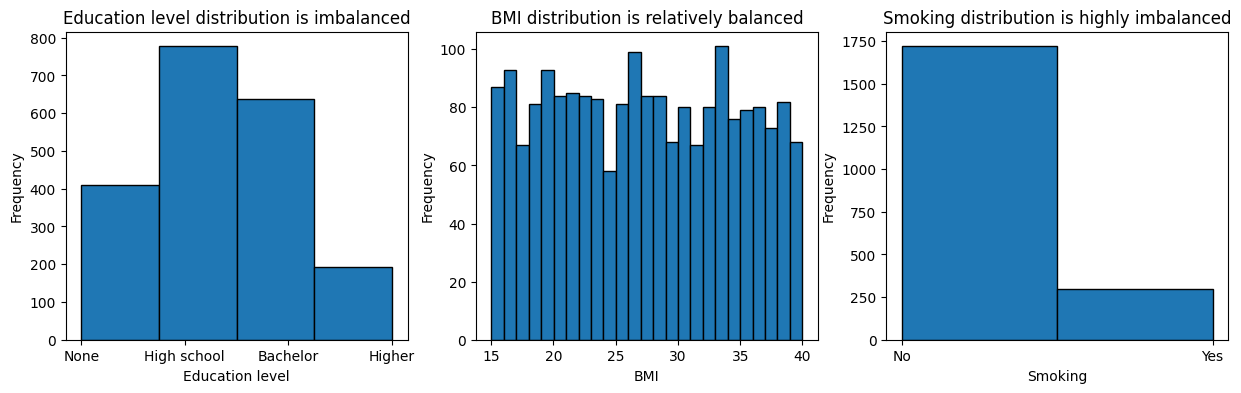

In [5]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(patients_df['education_level'].sort_values(), bins=4, edgecolor='black')
plt.title('Education level distribution is imbalanced')
plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3], ['None', 'High school', 'Bachelor', 'Higher'])

plt.subplot(1, 3, 2)
plt.hist(patients_df['bmi'], bins=25, edgecolor='black')
plt.title('BMI distribution is relatively balanced')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(patients_df['smoking'], bins=2, edgecolor='black')
plt.title('Smoking distribution is highly imbalanced')
plt.xlabel('Smoking')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Frequency')
plt.show()


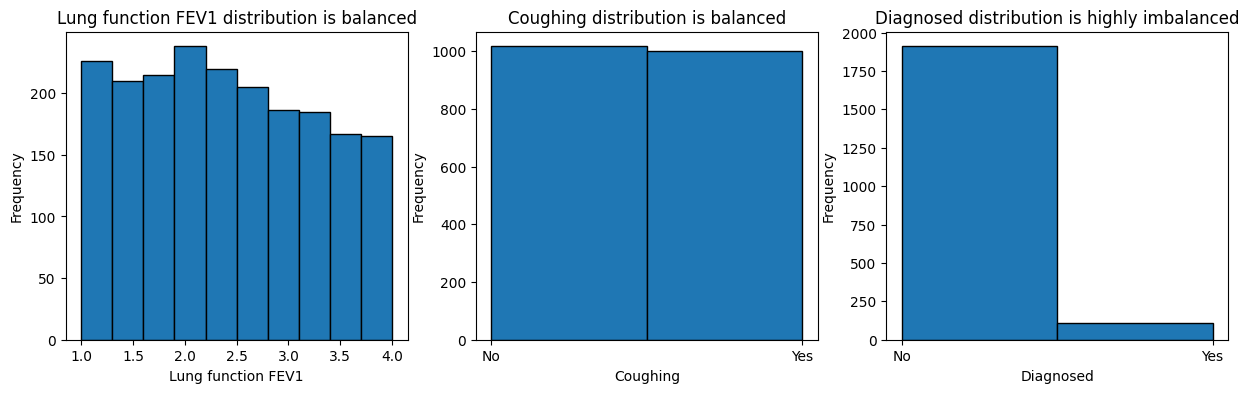

In [6]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(patients_df['lung_function_fev1'].sort_values(), edgecolor='black')
plt.title('Lung function FEV1 distribution is balanced')
plt.xlabel('Lung function FEV1')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(patients_df['coughing'], bins=2, edgecolor='black')
plt.title('Coughing distribution is balanced')
plt.xlabel('Coughing')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(patients_df['diagnosis'], bins=2, edgecolor='black')
plt.title('Diagnosed distribution is highly imbalanced')
plt.xlabel('Diagnosed')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Frequency')
plt.show()


* **OBSERVATION**: The data is highly unbalanced (including the target class `diagnosis`). We'll have to think of a way to handle this data imperfection. :)

## Correlations

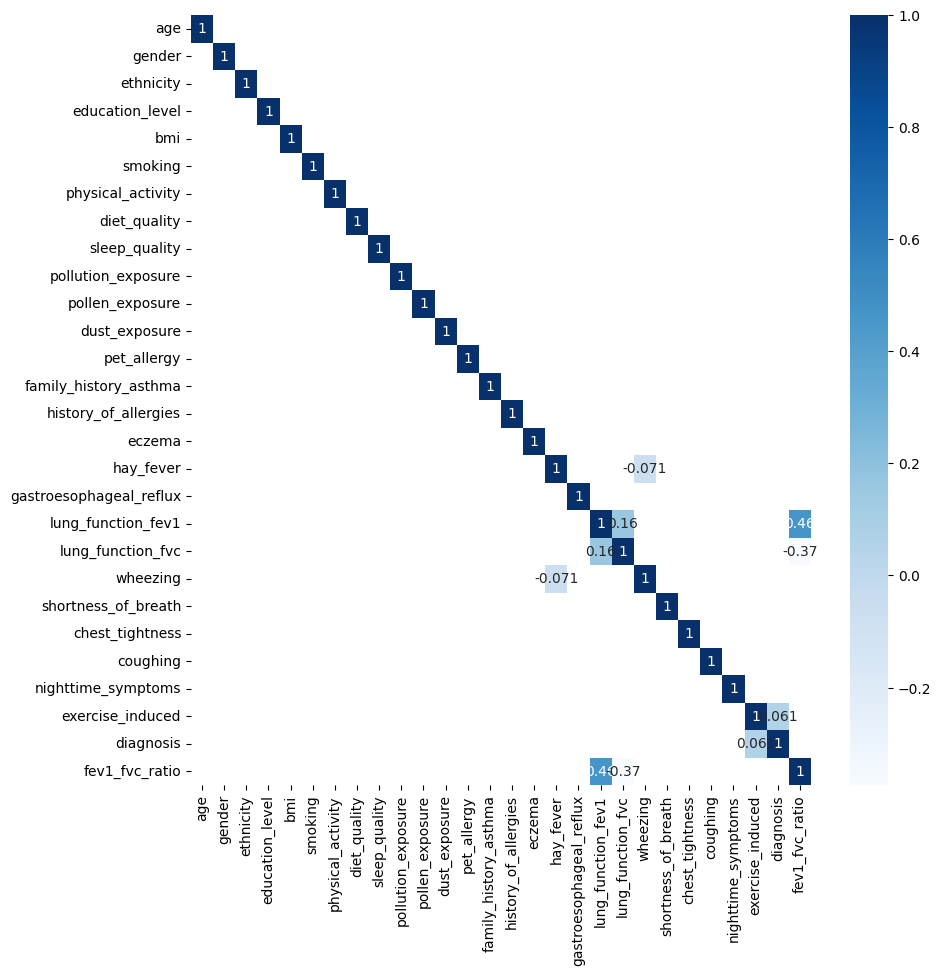

In [7]:
corr = patients_df.corr(method='kendall')
# Filter only on interesting values.
corr = corr[corr.abs() > 0.05]
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [8]:
# Print the highest correlations
print(f"The correlation between 'hay_fever' and 'wheezing' is {patients_df['hay_fever'].corr(patients_df['wheezing']):.3f}")
print(f"The correlation between 'smoking' and 'shortness_of_breath' is {patients_df['smoking'].corr(patients_df['shortness_of_breath']):.3f}")

The correlation between 'hay_fever' and 'wheezing' is -0.071
The correlation between 'smoking' and 'shortness_of_breath' is -0.049


* **OBSERVATION**: No strong correlations are observed here. We'll might need to analyze the data visually as well.

#### Diagnosis vs Age

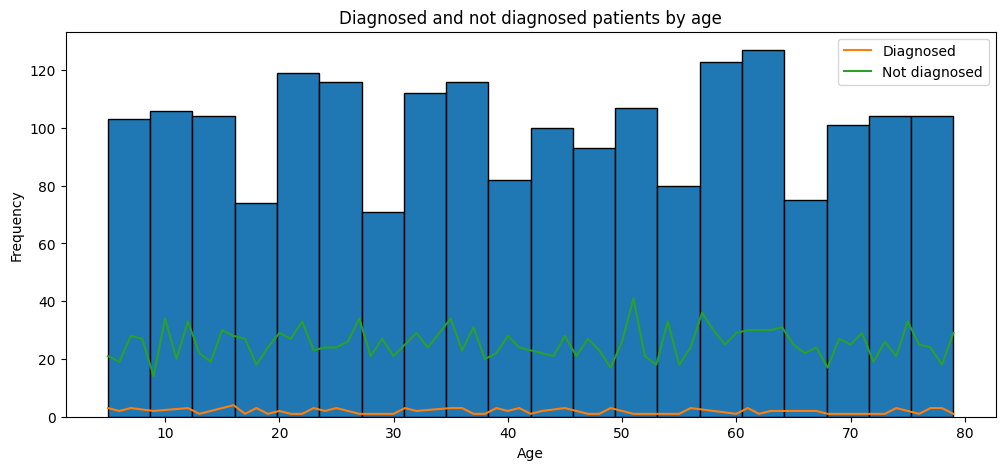

In [9]:
# Group diagnosed patients by age
diagnosed_patients = patients_df[patients_df['diagnosis'] == '1']
diagnosed_patients_by_age = diagnosed_patients.groupby('age').size().reset_index(name='count')

# Not diagnosed patients by age
not_diagnosed_patients = patients_df[patients_df['diagnosis'] == '0']
not_diagnosed_patients_by_age = not_diagnosed_patients.groupby('age').size().reset_index(name='count')

plt.figure(figsize=(12, 5))
plt.hist(patients_df['age'], bins=20, edgecolor='black')
plt.plot(diagnosed_patients_by_age['age'], diagnosed_patients_by_age['count'], label='Diagnosed')
plt.plot(not_diagnosed_patients_by_age['age'], not_diagnosed_patients_by_age['count'], label='Not diagnosed')
plt.title('Diagnosed and not diagnosed patients by age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

* **OBSERVATION**: No visual proof for a strong correlation between `age` and `diagnosis`.

#### Diagnosis vs Education Level

In [10]:
edu_level_diagnosis_counts = pd.crosstab(patients_df['education_level'], patients_df['diagnosis'])
edu_level_diagnosis_pctg = edu_level_diagnosis_counts.apply(lambda r: r/r.sum()*100, axis=1)

print("\n0: None,\n1: High School,\n2: Bachelor,\n3: Higher")
print("\nFrequency of each EducationLevel by diagnosis status:")
print(edu_level_diagnosis_pctg)


0: None,
1: High School,
2: Bachelor,
3: Higher

Frequency of each EducationLevel by diagnosis status:
diagnosis                0         1
education_level                     
0                94.890511  5.109489
1                94.465894  5.534106
2                96.232339  3.767661
3                90.104167  9.895833


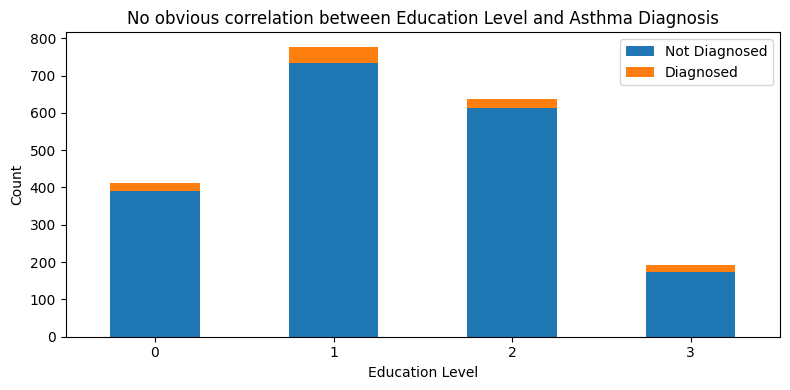

In [11]:
edu_level_diagnosis_counts.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('No obvious correlation between Education Level and Asthma Diagnosis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Diagnosed', 'Diagnosed'])

plt.tight_layout()
plt.show()

In [12]:
# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(edu_level_diagnosis_counts)
# Print results
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is a significant association between EducationLevel and Diagnosis.")
    # Identify groups with higher observed values than expected
    for level in edu_level_diagnosis_counts.index:
        observed_value = edu_level_diagnosis_counts.loc[level][1]
        expected_value = expected[int(level), 1]
        print(f"\tObserved/Expected: {observed_value:.2f}/{expected_value:.2f}")
        if observed_value > expected_value:
            print(f"\t\tEducation Level {level} has a higher tendency towards Diagnosis 1.")
else:
    print("There is no significant association between EducationLevel and Diagnosis.")

Chi-square statistic: 11.164617089393813
p-value: 0.010868231992549748
Degrees of freedom: 3
There is a significant association between EducationLevel and Diagnosis.
	Observed/Expected: 21.00/21.80
	Observed/Expected: 43.00/41.22
		Education Level 1 has a higher tendency towards Diagnosis 1.
	Observed/Expected: 24.00/33.79
	Observed/Expected: 19.00/10.19
		Education Level 3 has a higher tendency towards Diagnosis 1.


C:\Users\mdzho\AppData\Local\Temp\ipykernel_22976\4234165821.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  observed_value = edu_level_diagnosis_counts.loc[level][1]


* **OBSERVATION**: There is a co-relation between `education level` and `diagnosis`. Patients with `education_level=1` (High School) and `education_level=3` (Higher than Bachelor) have tendency toward `diagnosis`.

#### Smoking vs Shortness of breath

In [13]:
smoking_breath_shortness_counts = pd.crosstab(patients_df['smoking'], patients_df['shortness_of_breath'])
smoking_breath_shortness_pctg = smoking_breath_shortness_counts.apply(lambda r: r/r.sum()*100, axis=1)

print("\n0: No,\n1: Yes")
print("\nFrequency of each Smoking by Shortness of Breath:")
print(smoking_breath_shortness_pctg)


0: No,
1: Yes

Frequency of each Smoking by Shortness of Breath:
shortness_of_breath          0          1
smoking                                  
0                    49.098313  50.901687
1                    56.040268  43.959732


* **OBSERVATION**: Hmm, `smoking` people tend to suffer `shortness of breath` a little bit more. But still, not a conclusive relation here.

Out of curiosity let's check one more thing...

In [14]:
# Return all male, aged 35-40 non-smokers with highest education level and BMI 25-30
cool_guys_df = patients_df[(patients_df['gender'] == '1') 
                    & (patients_df['age'] >= 35) 
                    & (patients_df['age'] <= 40) 
                    & (patients_df['smoking'] == '0') 
                    & (patients_df['education_level'] == '3') 
                    & (patients_df['bmi'] >= 29)
                    & (patients_df['bmi'] <= 30)
                    ]
print(f"Cool guys count: {cool_guys_df.shape[0]}")
print(f"How many of them are diagnosed with asthma? {cool_guys_df[cool_guys_df['diagnosis'] == '1'].shape[0]}")

Cool guys count: 1
How many of them are diagnosed with asthma? 0


Mic down! I don't need any more data analysis! :D

## Persist output

We should persist the current state of the dataframe to a file on the OS.

In [15]:
patients_df.shape

(2017, 28)

In [16]:
to_csv(patients_df, '../data/04_data_analyzed.csv')